# Synthesis of a pseudo-mainnet

## Set up packages

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(geosphere, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(igraph, quietly=TRUE)
    require(jsonlite, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Read data files

### Probes of mainnet nodes

In [2]:
ptNodes <- fread("../../data/simulation/pseudo-mainnet/pt_nodes.csv", stringsAsFactors=TRUE)
ptNodes %>% summary

                                                                id      
 0049eca4703be755cef74ed20e1815b50b5fa0ceb07c6b822c78355dd12fdaa6:   1  
 0078d0f5d825d8946e0809e85fe0f21589294cae912104b3ca9f0e4bb93552c3:   1  
 008c441677a37d339c96a2bf2c9aa377e2411a00eb9d4588e3362043f0d7b744:   1  
 012200f2a61b1d302998036a06091f074f95125848e9caff9f0d23e392538936:   1  
 012c09d9b08f7c26d9076a0aea43ead69de74de251de49c6ba67e40d0613053b:   1  
 01567bed7019b7452a243cb66b3e8cc433c2eafe4d7569e49227d61bcfd6d33f:   1  
 (Other)                                                         :2195  
               n2n_version   peer_sharing      asn                   country   
 NodeToNodeVersionV10:   1   f: 745       Min.   :   209   Germany       :528  
 NodeToNodeVersionV11:   1   t:1456       1st Qu.: 14061   United States :502  
 NodeToNodeVersionV13: 869                Median : 20860   Canada        :154  
 NodeToNodeVersionV14:1330                Mean   : 61266   Japan         :123  
                

### Probes of mainnet edges

In [3]:
ptEdges <- fread("../../data/simulation/pseudo-mainnet/pt_edges.csv", stringsAsFactors=TRUE)
ptEdges %>% summary

                                                              source     
 99f4b029b0864e19334824015c8d05b34c34353ab7fe36e9da91689ceb512b66:   67  
 7e0520b4ebf8159bd1e219d49fc847efc9fe54332cc36aa5ac2350020c2a4939:   64  
 624d8747537834fe5aa3da126f5647904f2425fb002c72be6fe811fbd671412b:   61  
 73a4c479d08b254dab522708a611981c48e8323ae39ab6ad838c30ba3c8c8811:   59  
 1b80ab54864c57bf4f1e9646d30edf48e4d98e8d70ecaacac89adb3a48be5726:   57  
 4a5c7640e2e4f40870dfe3df1fe942e90f718394bd68de31e5ec9730c5ece414:   57  
 (Other)                                                         :49569  
                                                              target     
 99f4b029b0864e19334824015c8d05b34c34353ab7fe36e9da91689ceb512b66:  194  
 2d8b0cb5e44c3e746e7e29fb025dcb258aaf4df658f41c11bdc6824a9059fb84:  185  
 9b88f53637710f0b577b5cc060e67ceb1fddbee24c18f600b4497829d2e2323f:  181  
 d651218f17c10c040eb944416864971abd396ff8142bda7e2d97e26a7fc3a987:  177  
 d0cca0575254a0c01423d9532b4223e4dc467

## Peer connectivity

### Histogram

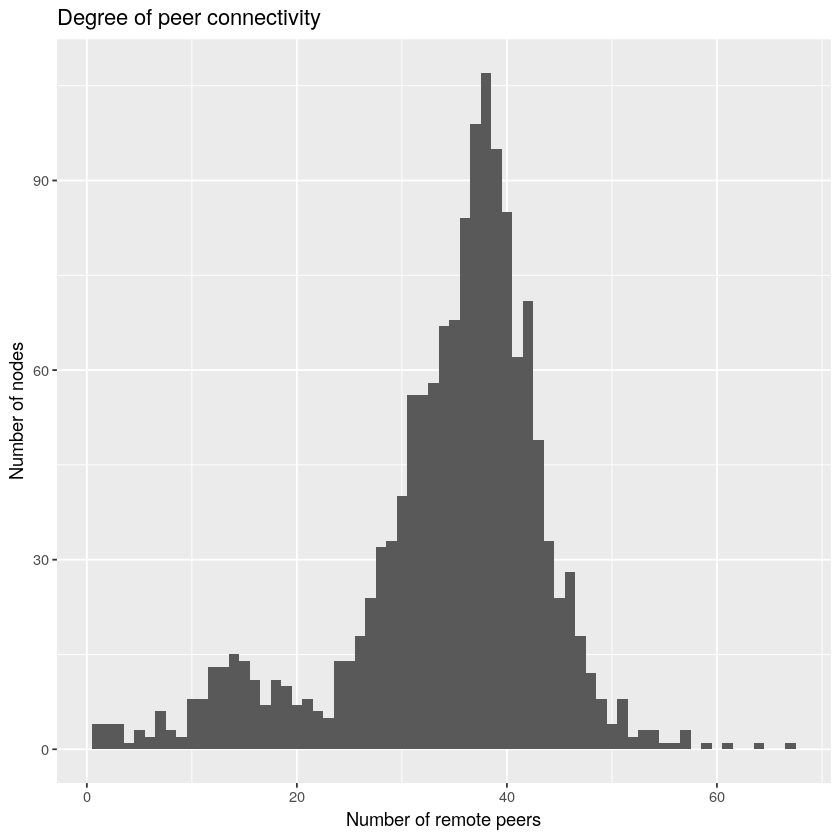

In [4]:
ggplot(
    ptEdges[, .(`Number of remote peers`=.N), .(`Source`=`source`)],
    aes(x=`Number of remote peers`)
) +
    geom_histogram(binwidth=1) +
    ylab("Number of nodes") +
    ggtitle("Degree of peer connectivity")

In [5]:
ggsave("cfd-peer-connectivity-histogram.png", units="in", dpi=150, width=8, height=6)

In [6]:
ggsave("cfd-peer-connectivity-histogram.svg", units="in", dpi=150, width=8, height=6)

## ASN connectivity

In [7]:
ptEdgesAsn <-
    ptNodes[, .(`target_asn`=`asn`, `target`=`id`)][
        ptNodes[, .(`source_asn`=`asn`, `source`=`id`)][
            ptEdges[, .(`Number of connections`=.N), .(`source`, `target`)],
            on="source"
        ][, .(`Number of connections`=sum(`Number of connections`)), .(`source_asn`, `target`)],
        on="target"
    ][!is.na(`source_asn`) & !is.na(`target_asn`), .(`Number of connections`=sum(`Number of connections`)), .(`source_asn`, `target_asn`)]
ptEdgesAsn %>% summary

   source_asn       target_asn     Number of connections
 Min.   :   209   Min.   :   209   Min.   :  1.000      
 1st Qu.:  7992   1st Qu.:  8560   1st Qu.:  1.000      
 Median : 20115   Median : 20473   Median :  1.000      
 Mean   : 61804   Mean   : 61767   Mean   :  5.382      
 3rd Qu.: 51167   3rd Qu.: 51167   3rd Qu.:  3.000      
 Max.   :401116   Max.   :401116   Max.   :756.000      

### Histogram

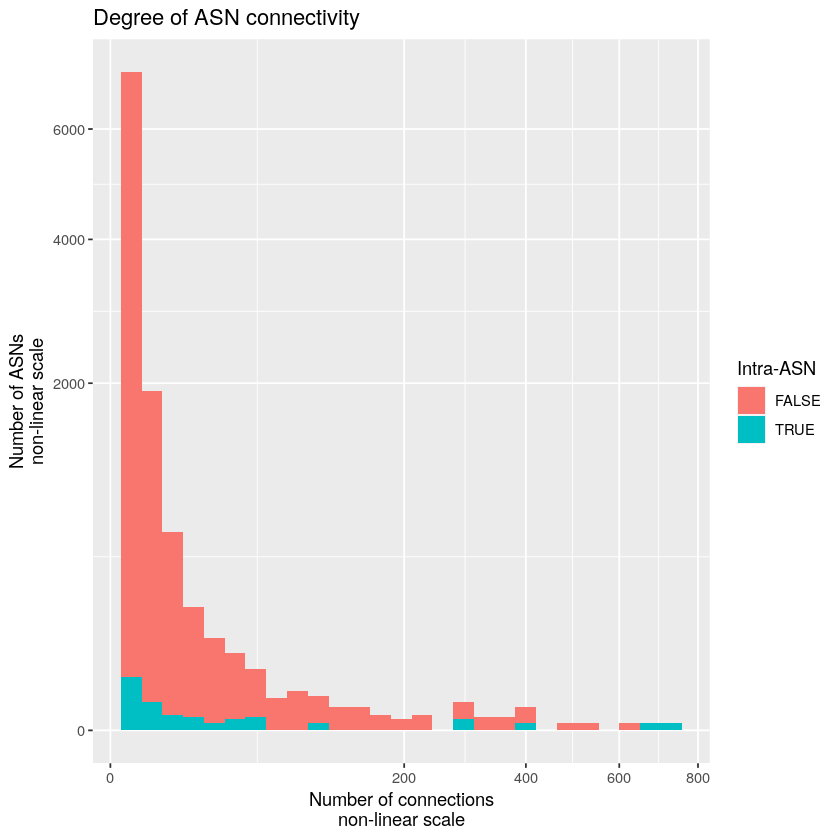

In [8]:
ggplot(ptEdgesAsn[, .(`Intra-ASN`=`source_asn`==`target_asn`, `Number of connections`)], aes(x=`Number of connections`, fill=`Intra-ASN`)) +
    geom_histogram(binwidth=1) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("Number of connections\nnon-linear scale") +
    ylab("Number of ASNs\nnon-linear scale") +
    ggtitle("Degree of ASN connectivity")

In [9]:
ggsave("cfd-asn-connectivity-histogram.png", units="in", dpi=150, width=8, height=6)

In [10]:
ggsave("cfd-asn-connectivity-histogram.svg", units="in", dpi=150, width=8, height=6)

## Country connectivity

In [11]:
ptEdgesCountry <-
    ptNodes[, .(`target_country`=`country`, `target`=`id`)][
        ptNodes[, .(`source_country`=`country`, `source`=`id`)][
            ptEdges[, .(`Number of connections`=.N), .(`source`, `target`)],
            on="source"
        ][, .(`Number of connections`=sum(`Number of connections`)), .(`source_country`, `target`)],
        on="target"
    ][!is.na(`source_country`) & !is.na(`target_country`), .(`Number of connections`=sum(`Number of connections`)), .(`source_country`, `target_country`)]
ptEdgesCountry %>% summary

        source_country       target_country Number of connections
 Germany       :  55   Germany      :  54   Min.   :   1.00      
 United States :  53   Japan        :  54   1st Qu.:   1.00      
 Japan         :  50   United States:  54   Median :   4.00      
 Canada        :  48   Canada       :  50   Mean   :  36.66      
 United Kingdom:  48   France       :  50   3rd Qu.:  14.00      
 Singapore     :  46   Singapore    :  50   Max.   :4110.00      
 (Other)       :1062   (Other)      :1050                        

### Histogram

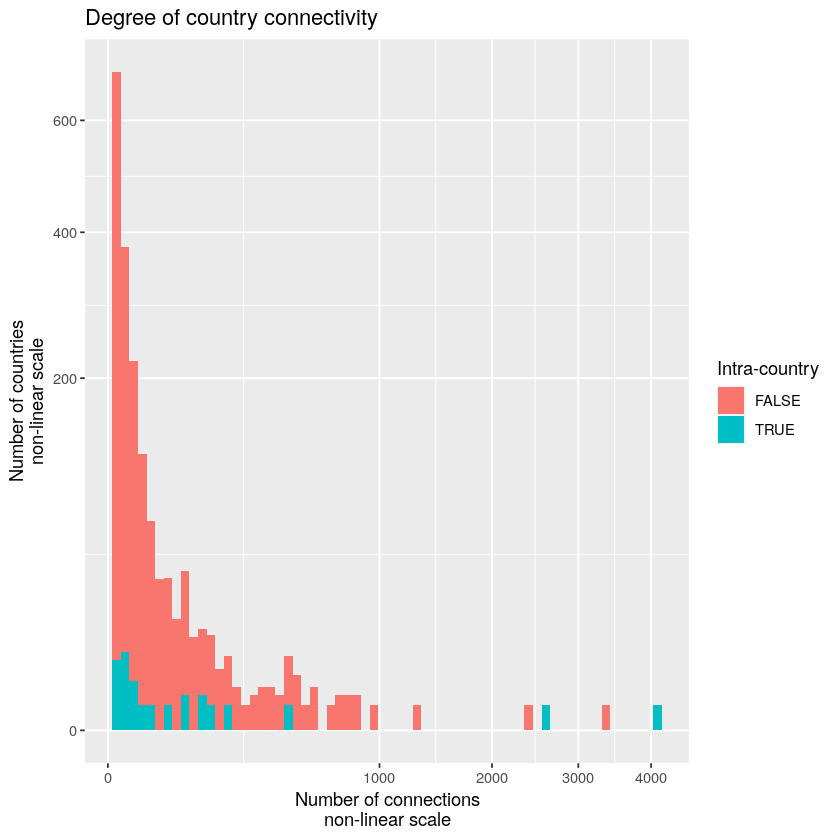

In [12]:
ggplot(ptEdgesCountry[, .(`Intra-country`=`source_country`==`target_country`, `Number of connections`)], aes(x=`Number of connections`, fill=`Intra-country`)) +
    geom_histogram(binwidth=1) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("Number of connections\nnon-linear scale") +
    ylab("Number of countries\nnon-linear scale") +
    ggtitle("Degree of country connectivity")

In [13]:
ggsave("cfd-cty-connectivity-histogram.png", units="in", dpi=150, width=8, height=6)

In [14]:
ggsave("cfd-cty-connectivity-histogram.svg", units="in", dpi=150, width=8, height=6)

### Heat map

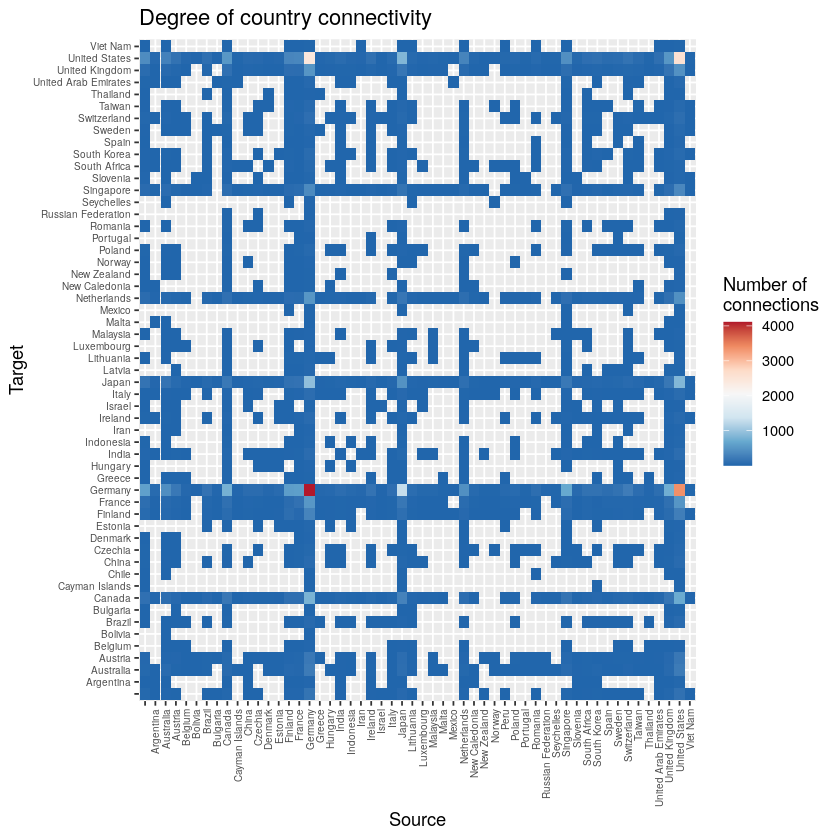

In [15]:
ggplot(
    ptEdgesCountry[, .(`Number of\nconnections`=sum(`Number of connections`)), .(`Source`=`source_country`, `Target`=`target_country`)],
    aes(x=`Source`, y=`Target`, fill=`Number of\nconnections`)
) +
    geom_tile() +
    scale_fill_distiller(palette = "RdBu", direction = -1) +
    theme(
        axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=6),
        axis.text.y=element_text(size=6)
    ) +
ggtitle("Degree of country connectivity")

In [16]:
ggsave("cfd-cty-connectivity-heatmap.png", units="in", dpi=150, width=8, height=6)

In [17]:
ggsave("cfd-cty-connectivity-heatmap.svg", units="in", dpi=150, width=8, height=6)

### Distance

In [18]:
countryGeo <- fread("https://raw.githubusercontent.com/gavinr/world-countries-centroids/refs/heads/master/dist/countries.csv", stringsAsFactors=TRUE)
countryGeo[`COUNTRY` == "Vietnam", `COUNTRY`:="Viet Nam"]
countryGeo[`COUNTRY` == "Czech Republic", `COUNTRY`:="Czechia"]
countryGeo <- rbind(data.table(`longitude`=121, `latitude`=23.5, `COUNTRY`="Taiwan", `ISO`="TW", `COUNTRYAFF`=NA, `AFF_ISO`=NA), countryGeo)
countryGeo %>% summary

   longitude          latitude                  COUNTRY         ISO     
 Min.   :-178.13   Min.   :-77.1699   Taiwan        :  1   BQ     :  3  
 1st Qu.: -56.25   1st Qu.: -0.3526   Afghanistan   :  1   TF     :  3  
 Median :  16.65   Median : 16.1228   Albania       :  1   ES     :  2  
 Mean   :  10.84   Mean   : 15.9032   Algeria       :  1   TW     :  1  
 3rd Qu.:  47.42   3rd Qu.: 38.4453   American Samoa:  1   AD     :  1  
 Max.   : 179.22   Max.   : 78.5732   Andorra       :  1   (Other):239  
                                      (Other)       :244   NA's   :  1  
          COUNTRYAFF     AFF_ISO   
 United Kingdom: 16   GB     : 16  
 France        : 15   FR     : 15  
 United States :  7   US     :  7  
 Netherlands   :  6   NL     :  6  
 Australia     :  5   AU     :  5  
 (Other)       :200   (Other):199  
 NA's          :  1   NA's   :  2  

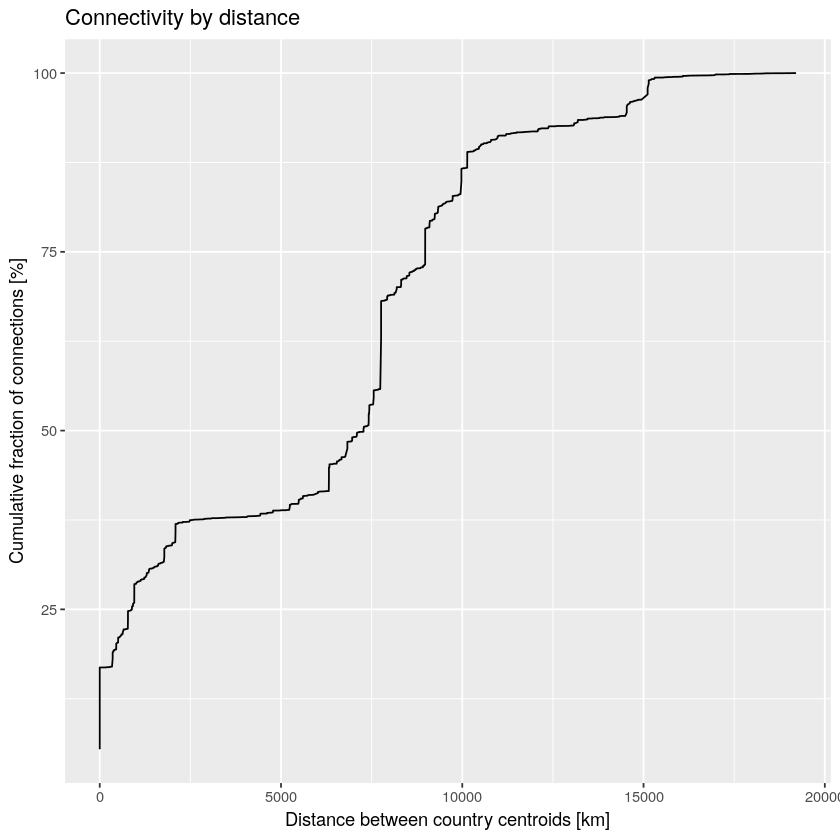

In [19]:
ggplot(
    countryGeo[, .(`target_country`=`COUNTRY`, `target_lat`=`latitude`, `target_lon`=`longitude`)][
        countryGeo[, .(`source_country`=`COUNTRY`, `source_lat`=`latitude`, `source_lon`=`longitude`)][
            ptEdgesCountry,
            on="source_country"
        ],
        on="target_country"
    ][
        !is.na(`source_country`) & !is.na(`target_country`),
        .(
            `Source`=`source_country`,
            `Target`=`target_country`,
            `Number of connections`,
            `Distance between country centroids [km]`=mapply(
                function(x1, y1, x2, y2) distHaversine(c(x1, y1), c(x2, y2))/1000, 
                `source_lon`, 
                `source_lat`,
                `target_lon`,
                `target_lat`
            )
        )
    ][
        order(`Distance between country centroids [km]`)
    ][
        !is.na(`Distance between country centroids [km]`),
        .(
            `Cumulative fraction of connections [%]`=100*cumsum(`Number of connections`)/sum(`Number of connections`),
            `Distance between country centroids [km]`
        )
    ],
    aes(x=`Distance between country centroids [km]`, y=`Cumulative fraction of connections [%]`)
) +
    geom_line() +
    ggtitle("Connectivity by distance")

In [20]:
ggsave("cfd-cty-connectivity-cumdist.png", units="in", dpi=150, width=8, height=6)

In [21]:
ggsave("cfd-cty-connectivity-cumdist.svg", units="in", dpi=150, width=8, height=6)